# Overview:
In this third practical application assignment, your goal is to compare the performance of the classifiers (k-nearest neighbors, logistic regression, decision trees, and support vector machines) you encountered in this section of the program. You will use a dataset related to the marketing of bank products over the telephone.

## Data:
The dataset you will use comes from the [UCI Machine Learning repository](https://archive.ics.uci.edu/dataset/222/bank+marketing). The data is from a Portuguese banking institution and is a collection of the results of multiple marketing campaigns. You can make use of the article Links to an external site.accompanying the dataset (in the .zip file) for more information on the data and features.

## Deliverables:
After understanding, preparing, and modeling your data, build a Jupyter Notebook that includes a clear statement demonstrating your understanding of the business problem, a correct and concise interpretation of descriptive and inferential statistics, your findings (including actionable insights), and next steps and recommendations.

This is a required assignment and counts toward program completion.



# Dataset

   ##Input variables:
   ### bank client data:
   1. age (numeric)
   2. job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   3. marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4. education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   5. default: has credit in default? (categorical: "no","yes","unknown")
   6. housing: has housing loan? (categorical: "no","yes","unknown")
   7. loan: has personal loan? (categorical: "no","yes","unknown")
   ### related with the last contact of the current campaign:
   8. contact: contact communication type (categorical: "cellular","telephone") 
   9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  10. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  11. duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   ### other attributes:
  12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14. previous: number of contacts performed before this campaign and for this client (numeric)
  15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   ### social and economic context attributes
  16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17. cons.price.idx: consumer price index - monthly indicator (numeric)     
  18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19. euribor3m: euribor 3 month rate - daily indicator (numeric)
  20. nr.employed: number of employees - quarterly indicator (numeric)

  ## Output variable (desired target):
  21. - y - has the client subscribed a term deposit? (binary: "yes","no")



### Business Problem
Due to internal competition and
current financial crisis, there are huge pressures for
European banks to increase financial assets. 

To solve this
issue, one adopted strategy is offer attractive long-term
deposit applications with good interest rates, in particular
by using directed marketing campaigns.

The primary goal is to increase the 
efficiency of these directed campaigns for long-term deposit
subscriptions by reducing the number of contacts required for each successful outcome.

Thus,
there is a need for an improvement in efficiency: fewer
contacts should be done, but an approximately number of
successes (clients subscribing the deposit) should be kept.

### Data Problem
Based on the dataset, build a predictive model which classifies prospective applicants into two classes:
1. Likely to purchase with minimal contacts.
2. Unlikely to purchase or likely to require many contacts.

The model will be built from the subset of the dataset with:
* known outcome
* known contact result
* sufficient other input data fields necessary to predict the outcome

Accordingly, the model will maximize accuracy for a combined compound outcome metric built from outcome 'y' and the contact result fields (campaign + previous).

### Descriptive and Inferential Statistics
| **Aspect**                | **Descriptive Statistics**                                          | **Inferential Statistics**                                                   |
|---------------------------|---------------------------------------------------------------------|------------------------------------------------------------------------------|
| **Purpose**                | Summarizes the characteristics of a dataset.                       | Draws conclusions or makes predictions about a population from a sample.     |
| **Focus**                  | Focuses on presenting raw data as insights (e.g., mean, median).   | Focuses on making generalizations beyond the data (e.g., confidence intervals). |
| **Techniques Used**        | Measures like mean, median, mode, range, and standard deviation.   | Techniques like hypothesis testing, regression, and confidence intervals.    |
| **Data Scope**             | Describes only the observed dataset.                               | Attempts to make inferences about a broader population from the dataset.     |
| **Complexity**             | Simpler, deals only with what is observed.                         | More complex, involving probability theory and sampling methods.             |


### Findings

### Next Steps and Recommendations


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


In [2]:
bank = pd.read_csv('data/bank-additional.csv', sep=';')
orig = pd.read_csv('data/bank-additional.csv', sep=';') # use as reference copy

In [3]:
#data
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


### Considerations for Bank model

* many parameters
* many need to be encoded
* unbalanced
* 'duration' - last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


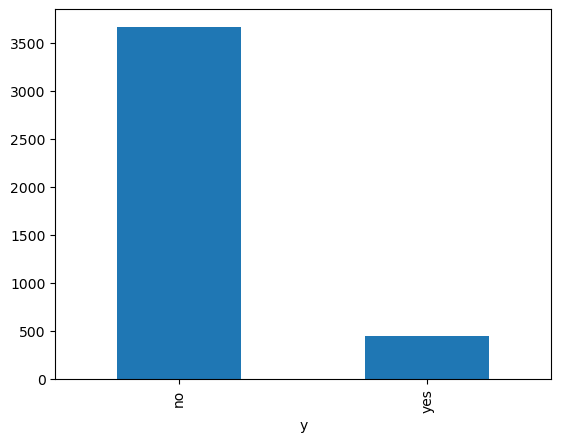

In [4]:
#build a histogram of the y counts
bank['y'].value_counts().plot(kind='bar')
plt.show()



### Data Prep

#### notes from article
* Understanding we transformed the output into a binary
task, by using only the conclusive results of Table 1:
successful and unsuccessful.
* Hence,
the non-conclusive instances were discarded, leading to a
total of 55817 contacts (the same 6499 successes).
* For example, Figure 2 shows that the Sex attribute can be
discarded, since the rate of successes for Male and Female
is almost the same. 
* Since we had a large dataset, we opted to discard
the examples that contained missing values, leading to a
dataset with 45211 instances (5289 of which were
successful – 11.7% success rate).




In [5]:
# replace the y values with 0 and 1
bank['y'] = bank['y'].replace('no', 0)
bank['y'] = bank['y'].replace('yes', 1)



In [6]:
# look at the column types
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [7]:
# get the counts of the education column
bank['education'].value_counts()

education
university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: count, dtype: int64

In [8]:
# look at the value counts for all the non-numeric columns
for col in bank.columns:
    if bank[col].dtype == 'object':
        print(bank[col].value_counts())
        print('\n')

        

job
admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: count, dtype: int64


marital
married     2509
single      1153
divorced     446
unknown       11
Name: count, dtype: int64


education
university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: count, dtype: int64


default
no         3315
unknown     803
yes           1
Name: count, dtype: int64


housing
yes        2175
no         1839
unknown     105
Name: count, dtype: int64


loan
no         3349
yes         665
unknown     105
Name: count, dtype: int64


contact
cellular     2652
telephone    1467
Name: count, dtype: int64


month
may    1378

# Data subsetting

In [9]:


y = bank['y']
X = bank.loc[:, 'age':'nr.employed']

X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


In [10]:
# numeric encode the education column
ed_values = {'education': ['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree', 'unknown']}

# Define a mapping dictionary for education levels
ed_mapping = {
    'illiterate': 0,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school': 4,
    'professional.course': 5,
    'university.degree': 6,
    'unknown': -1
}

# Create a new column 'education_encoded' using the mapping
X['education_encoded'] = X['education'].map(ed_mapping)

#replace the unknown values with the mean of the known values in the education_encoded column
mean_ed = round(X[X['education_encoded'] != -1]['education_encoded'].mean())
X['education_encoded'] = X['education_encoded'].replace(-1, mean_ed)

In [11]:
# drop the original education column
X = X.drop('education', axis=1)
X.head()

,age,job,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,education_encoded
0,30,blue-collar,married,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,3
1,39,services,single,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,4
2,25,services,married,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,4
3,38,services,married,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,3
4,47,admin.,married,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,6


In [12]:
# numeric encode the day_of_week column
day_mapping = {
    'mon': 1,
    'tue': 2,
    'wed': 3,
    'thu': 4,
    'fri': 5
}

X['day_of_week_encoded'] = X['day_of_week'].map(day_mapping)

# drop the original day_of_week column
X = X.drop('day_of_week', axis=1)

X.head()

,age,job,marital,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,education_encoded,day_of_week_encoded
0,30,blue-collar,married,no,yes,no,cellular,may,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,3,5
1,39,services,single,no,no,no,telephone,may,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,4,5
2,25,services,married,no,yes,no,telephone,jun,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,4,3
3,38,services,married,no,unknown,unknown,telephone,jun,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,3,5
4,47,admin.,married,no,yes,no,cellular,nov,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,6,1


In [13]:
# numeric encode the month column
month_mapping = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

X['month_encoded'] = X['month'].map(month_mapping)

# drop the original month column
X = X.drop('month', axis=1)

X.head()

,age,job,marital,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,education_encoded,day_of_week_encoded,month_encoded
0,30,blue-collar,married,no,yes,no,cellular,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,3,5,5
1,39,services,single,no,no,no,telephone,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,4,5,5
2,25,services,married,no,yes,no,telephone,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,4,3,6
3,38,services,married,no,unknown,unknown,telephone,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,3,5,6
4,47,admin.,married,no,yes,no,cellular,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,6,1,11


In [14]:
# list the remaining non-numeric columns

for col in X.columns:
    if X[col].dtype == 'object':
        print(col)
        

job
marital
default
housing
loan
contact
poutcome


In [15]:
# drop the duration column
X = X.drop('duration', axis=1)

In [16]:
# one-hot encode the remaining columns
X = pd.get_dummies(X, columns=['job', 'marital', 'default', 'housing', 'loan','contact', 'poutcome'])

X.head()




,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,education_encoded,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,3,...,False,True,True,False,False,True,False,False,True,False
1,39,4,999,0,1.1,93.994,-36.4,4.855,5191.0,4,...,False,False,True,False,False,False,True,False,True,False
2,25,1,999,0,1.4,94.465,-41.8,4.962,5228.1,4,...,False,True,True,False,False,False,True,False,True,False
3,38,3,999,0,1.4,94.465,-41.8,4.959,5228.1,3,...,True,False,False,True,False,False,True,False,True,False
4,47,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,6,...,False,True,True,False,False,True,False,False,True,False


In [17]:
# set y to the 'y' column
y = bank['y']


In [45]:
#separate the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Building

## Decision Tree

In [19]:
# build a decision tree model
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
%time
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'DT Model accuracy: {accuracy:.2f}')


CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 2.15 µs
DT Model accuracy: 0.85


In [143]:
# do a grid search to find the best hyperparameters for a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def dt_search(X_train, y_train, verbose=False, scoring='accuracy'):
    if (verbose) :
        print('\nDecision Tree Classifier:\n------------------------\n')

    tree = DecisionTreeClassifier(random_state=17)

    tree_params = {'max_depth': range(1, 11),
                    'max_features': range(4, 19)}

    tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=verbose, scoring=scoring)

    tree_grid.fit(X_train, y_train)

    if (verbose) :
        # print the best hyperparameters
        print(f'Parameters: {tree_grid.best_params_}')
        print(f'Accuracy: {tree_grid.best_score_}')

    return tree_grid.best_estimator_



In [66]:

clf = dt_model_search(X_train, y_train, True)



Decision Tree Classifier:
------------------------

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Parameters: {'max_depth': 2, 'max_features': 16}
Accuracy: 0.9031866464339909


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

def show_decision_tree(model, X, title):

    # Create a plot of the decision tree
    plt.figure(figsize=(12, 12))
    plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Yes','No'], rounded=True)
    plt.title(title)
    plt.show()

    # get the feature importances
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    # plot the feature importances, ordered
    plt.figure(figsize=(12, 8))
    plt.title(title + ": Feature importances")
    plt.bar(range(X.shape[1]), importances[indices], align='center')
    plt.xticks(range(X.shape[1]), np.array(X.columns)[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()


#### Logistic Regression Model

In [133]:
# do a grid search to find the best hyperparameters for a logistic regression model
from sklearn.model_selection import GridSearchCV

def lgr_search(X_train, y_train, verbose=False, scoring='accuracy'):
    if (verbose) :
        print('\nLogistic Regression:\n-------------------')
        
    lgr = LogisticRegression(max_iter=10000, class_weight='balanced')

    lgr_params = {'lgr__C': [0.01, 0.1, 1, 10, 100],
                  'lgr__solver': ['lbfgs', 'liblinear'],    # Common solvers
                  'lgr__penalty': ['l2']}             # Add other penalties as needed, e.g., 'l1'}

    # set up the pipeline with a standard scaler and the logistic regression model
    lgr_pipe = Pipeline([('scaler', StandardScaler()), ('lgr', lgr)])

    lgr_grid = GridSearchCV(lgr_pipe, lgr_params, cv=5, n_jobs=-1, verbose=verbose, scoring=scoring)

    lgr_grid.fit(X_train, y_train)

    if (verbose) :
        # print the best hyperparameters
        print(f'Parameters:{lgr_grid.best_params_}')
        print(f'Accuracy:{lgr_grid.best_score_}')

    lgr_model = lgr_grid.best_estimator_

    return lgr_model


In [53]:
def show_coefficients(model, X, title):
    # if the model is a pipeline, get the model from the last step
    if isinstance(model, Pipeline):
        model = model.steps[-1][1]
        
    # get the coefficients
    coefficients = model.coef_[0]
    indices = np.argsort(np.abs(coefficients))[::-1]

    # plot the absolute values of the coefficients
    plt.figure(figsize=(10, 5))
    plt.title(title + ": Coefficient values")
    plt.bar(range(X.shape[1]), coefficients[indices], align='center')
    plt.xticks(range(X.shape[1]), np.array(X.columns)[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()



### KNN

In [31]:
# do a grid search to find the best parameters for the KNN model
from sklearn.model_selection import GridSearchCV

def knn_search(X_train, y_train, verbose=False, scoring='accuracy'):
    if (verbose) :
        print('\nK-Nearest Neighbors:\n-------------------')

    # build a pipeline with a scaler and a KNN model
    knn_pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier())])

    knn_params = {
        'knn__n_neighbors': range(1, 11),
        'knn__weights': ['uniform', 'distance'],
        'knn__p': [1, 2]
    }

    knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=verbose, scoring=scoring)

    knn_grid.fit(X_train, y_train)

    if (verbose) :
        print(f'Parameters: {knn_grid.best_params_}')
        print(f'Accuracy: {knn_grid.best_score_}')

    return knn_grid.best_estimator_

knn_model = knn_search(X_train, y_train, True)



K-Nearest Neighbors:
-------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Parameters: {'knn__n_neighbors': 8, 'knn__p': 2, 'knn__weights': 'uniform'}
Accuracy: 0.8965098634294385


In [32]:
# show the permutation importances
from sklearn.inspection import permutation_importance

def show_permutation_importances(model, X, y, title):
    result = permutation_importance(model, X, y, n_repeats=10, random_state=17, n_jobs=-1)
    importances = result.importances_mean
    indices = np.argsort(np.abs(importances))[::-1]

    # plot the permutation importances
    plt.figure(figsize=(10, 5))
    plt.title(title + ": Permutation importances")
    plt.bar(range(X.shape[1]), importances[indices], align='center')
    plt.xticks(range(X.shape[1]), np.array(X.columns)[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])

    plt.show()


### SVM

In [33]:
#build an SVM model
from sklearn.svm import SVC

svm_model = SVC()
%time
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Model accuracy: {accuracy:.2f}')


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.1 µs
SVM Model accuracy: 0.92


In [134]:
def svm_search(X_train, y_train, verbose=False, scoring='accuracy'):
    if (verbose) :
        print('\nSupport Vector Machine:\n----------------------')

    # build a pipeline with a scaler and an SVM model
    svm_pipe = Pipeline([('scale', StandardScaler()), ('svm', SVC(class_weight='balanced'))])

    svm_params = {
        'svm__C': [0.1, 1, 10],
        'svm__kernel': ['linear', 'rbf'],
        'svm__gamma': ['scale', 'auto']
    }

    svm_grid = GridSearchCV(svm_pipe, svm_params, cv=5, n_jobs=-1, verbose=verbose, scoring=scoring)

    svm_grid.fit(X_train, y_train)

    if (verbose) :
        print(f'Parameters: {svm_grid.best_params_}')
        print(f'Accuracy: {svm_grid.best_score_}')

    return svm_grid.best_estimator_

svm_model = svm_search(X_train, y_train, True)


Support Vector Machine:
----------------------
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Parameters: {'svm__C': 1, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}
Accuracy: 0.8209408194233687


In [172]:
def show_svm(svm_model, X, title):
    # if the model is a pipeline, get the model from the last step
    if isinstance(svm_model, Pipeline):
        svm_model = svm_model.steps[-1][1]
        
    # if the outcome is linear, show the coefficients
    if (svm_model.kernel == 'linear'):   
        coefficients = svm_model.coef_[0]
        indices = np.argsort(np.abs(coefficients))[::-1]

        # plot the coefficients
        plt.figure(figsize=(10, 5))
        plt.title(title + ": Coefficient values")
        plt.bar(range(X.shape[1]), coefficients[indices], align='center')
        plt.xticks(range(X.shape[1]), np.array(X.columns)[indices], rotation=90)
        plt.xlim([-1, X.shape[1]])
        plt.show()

    #if the outcome is rbf, show the support vectors
    if (svm_model.kernel == 'rbf'):
        support_vectors = svm_model.support_vectors_

        #plot the support vectors
        plt.figure(figsize=(10, 5))
        plt.title(title + ": Support vectors")
        plt.scatter(support_vectors[:, 0], support_vectors[:, 1], c='r')
        plt.show()
        


# Running the Grid Searches and collating the results

In [176]:
# build a dataframe to store the results

res_dict = {'model': ['k Nearest Neighbors', 'Logistic Regression', 'Decision Tree', 'Support Vector Machine'],
            'train score': [0, 0, 0, 0],
            'accuracy': [0, 0, 0, 0],
            'precision': [0, 0, 0, 0],
            'recall': [0, 0, 0, 0],
            'f1': [0, 0, 0, 0],
            'roc_auc': [0, 0, 0, 0],
            'fit time': [0, 0, 0, 0],
            'seed': [0,0,0,0]}
results_df = pd.DataFrame(res_dict).set_index('model')

### Run all the grid searches and build the results dataframe

In [175]:
from time import time

def run_grids(X, y, title, n_iter=1, verbose=False, scoring='accuracy'):
    results_df.loc[:, 'train score'] = 0

    for iter in range(n_iter): 
        seed = np.random.randint(1000)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

        knn_model = knn_search(X_train, y_train, verbose, scoring)
        lgr_model = lgr_search(X_train, y_train, verbose, scoring)
        dt_model = dt_search(X_train, y_train, verbose, scoring)
        svm_model = svm_search(X_train, y_train, verbose, scoring)

        models = [knn_model, lgr_model, dt_model, svm_model]

        for i, model in enumerate(models):
            # skip the model if the train score is less than the best result so far
            if (model.score(X_train, y_train) < results_df.loc[results_df.index[i], 'train score']):
                if (verbose): print(f'skipping model: {results_df.index[i]}')
                continue

            if (verbose): print(f'refitting model: {results_df.index[i]}')
                                
            start = time()
            model.fit(X_train, y_train)
            end = time()
            fit_time = end - start

            preds = model.predict(X_test)
            
            results_df.loc[results_df.index[i], 'seed']         = seed
            results_df.loc[results_df.index[i], 'train score']  = float(model.score(X_train, y_train))
            results_df.loc[results_df.index[i], 'fit time']     = fit_time
            results_df.loc[results_df.index[i], 'accuracy']     = float(accuracy_score(y_test, preds))
            results_df.loc[results_df.index[i], 'precision']    = float(precision_score(y_test, preds))
            results_df.loc[results_df.index[i], 'recall']       = float(recall_score(y_test, preds))
            results_df.loc[results_df.index[i], 'f1']           = float(f1_score(y_test, preds))
            results_df.loc[results_df.index[i], 'roc_auc']      = float(roc_auc_score(y_test, preds))
            results_df.loc[results_df.index[i], 'estimator']    = model

        #save the results to a csv file
        results_df.to_csv(f'./data/{title}.{seed}_results.csv')

        if (verbose) :
            print(f'\nResults: Iteration-{iter+1} - Seed={seed}\n--------')
            print(results_df.iloc[:,:-1])

In [183]:
import warnings

# # raise an exception if a warning is generated
# warnings.filterwarnings('error', category=UserWarning)
# warnings.resetwarnings()

# Suppress all DeprecationWarnings and FutureWarnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

run_grids(X_train, y_train, 'Bank Data', 5, True, 'recall')


K-Nearest Neighbors:
-------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Parameters: {'knn__n_neighbors': 1, 'knn__p': 2, 'knn__weights': 'uniform'}
Accuracy: 0.28340151957919346

Logistic Regression:
-------------------
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Parameters:{'lgr__C': 0.01, 'lgr__penalty': 'l2', 'lgr__solver': 'liblinear'}
Accuracy:0.6860315604909409

Decision Tree Classifier:
------------------------

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Parameters: {'max_depth': 10, 'max_features': 15}
Accuracy: 0.3345996493278784

Support Vector Machine:
----------------------
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Parameters: {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Accuracy: 0.7169491525423728
refitting model: k Nearest Neighbors
refitting model: Logistic Regression
refitting model: Decision Tree
refitting model: Support Vector Machine

Results: Iteration-1 - Seed=1

# Plotting the results

/var/folders/v0/7hny_wjs4tg70rryd7blqpd00000gn/T/ipykernel_69183/3837496185.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


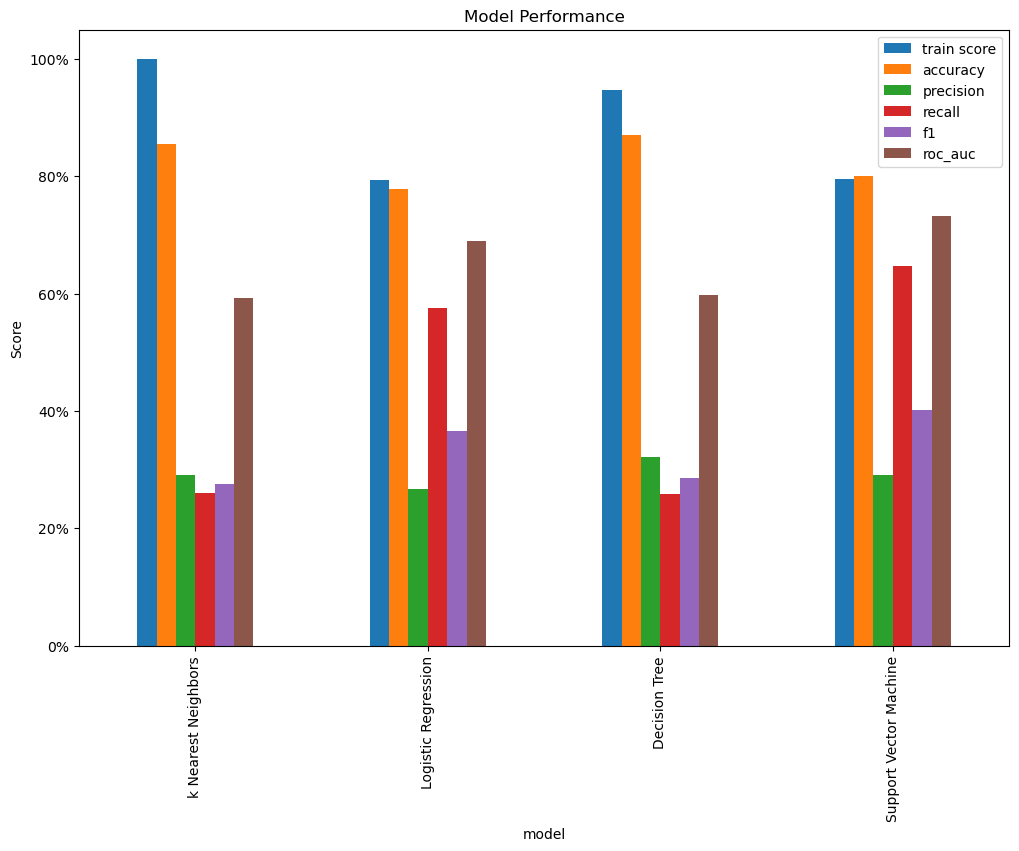

In [184]:
#plot the results
def plot_results(results_df):
    # plot the results, without the seed column
    results_df.iloc[:, :-1].plot(kind='bar', figsize=(12, 8))
    plt.title('Model Performance')
    plt.ylabel('Score')
    #make the y axis labels percentages
    plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
    plt.show()

plot_results(results_df.iloc[:,:-2]) 


/var/folders/v0/7hny_wjs4tg70rryd7blqpd00000gn/T/ipykernel_69183/281010320.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


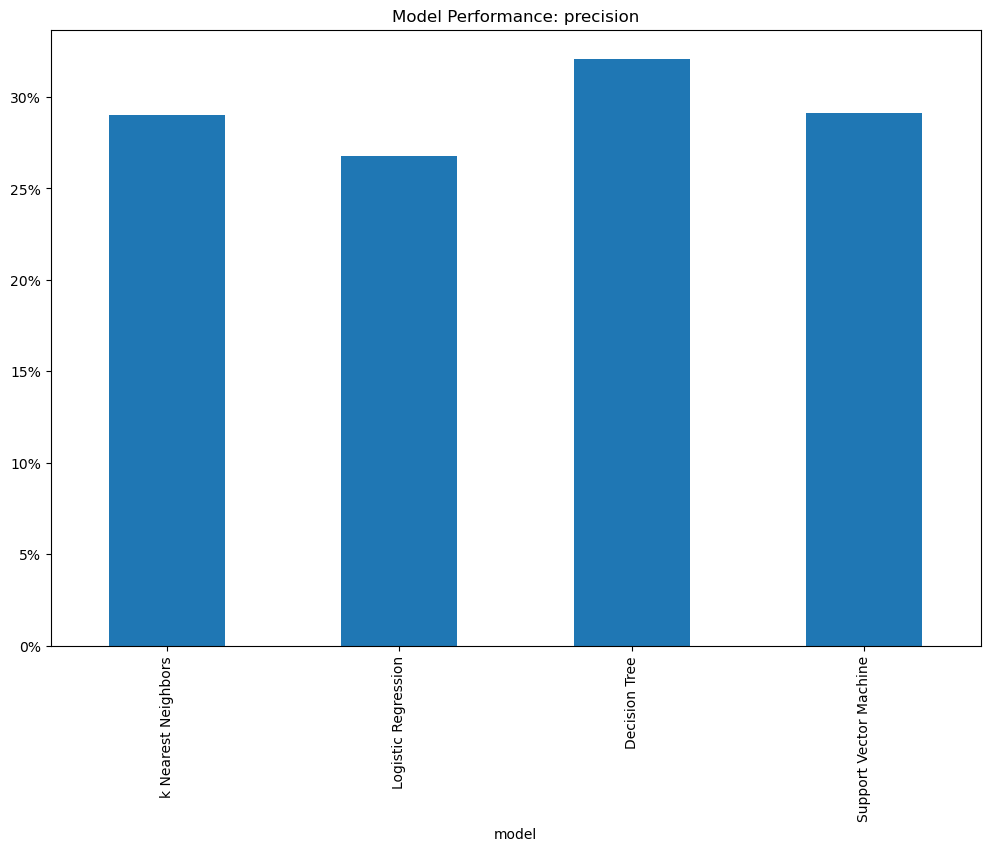

/var/folders/v0/7hny_wjs4tg70rryd7blqpd00000gn/T/ipykernel_69183/281010320.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


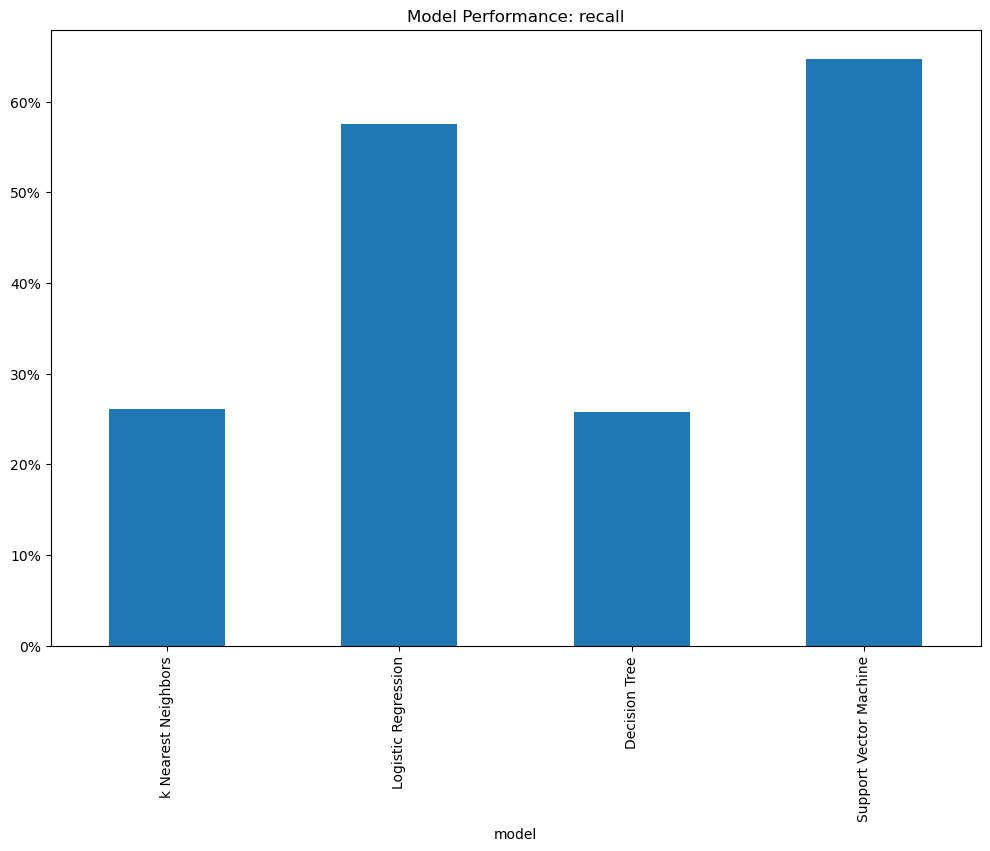

In [187]:
def plot_scoring(results_df, scoring):
    results_df[scoring].plot(kind='bar', figsize=(12, 8))
    plt.title(f'Model Performance: {scoring}')
    plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
    plt.show()

plot_scoring(results_df, 'precision')
plot_scoring(results_df, 'recall')


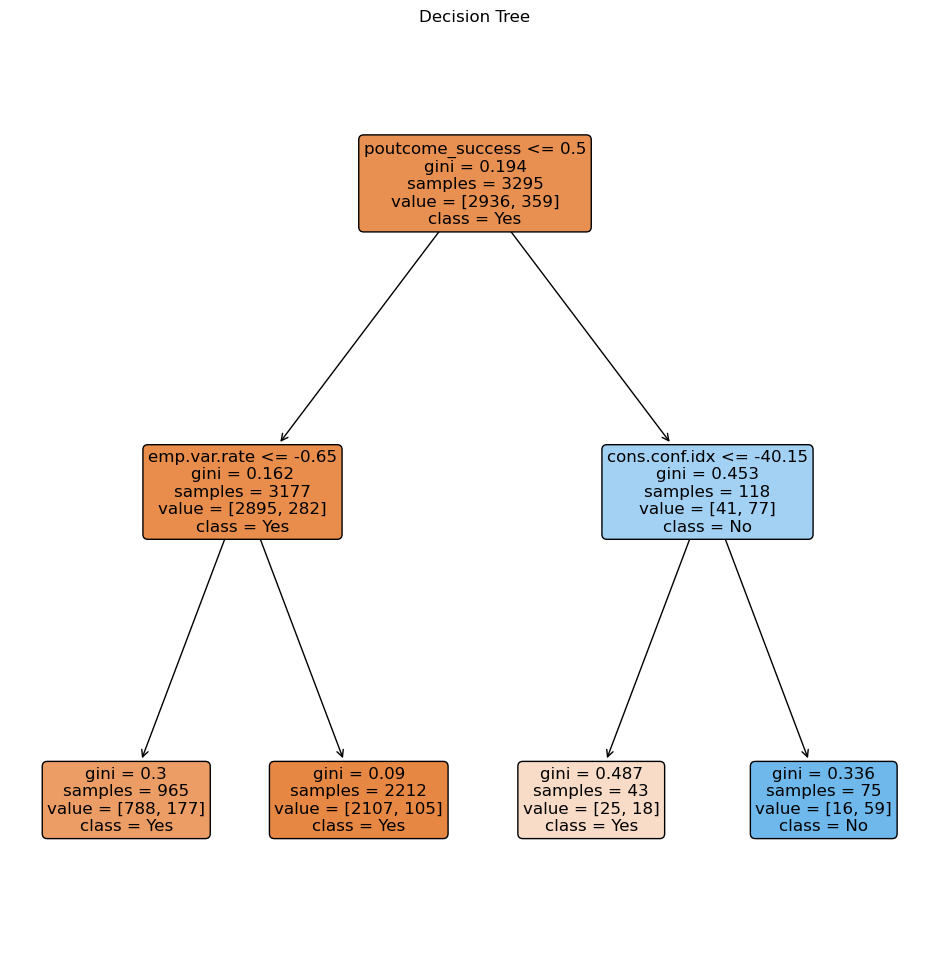

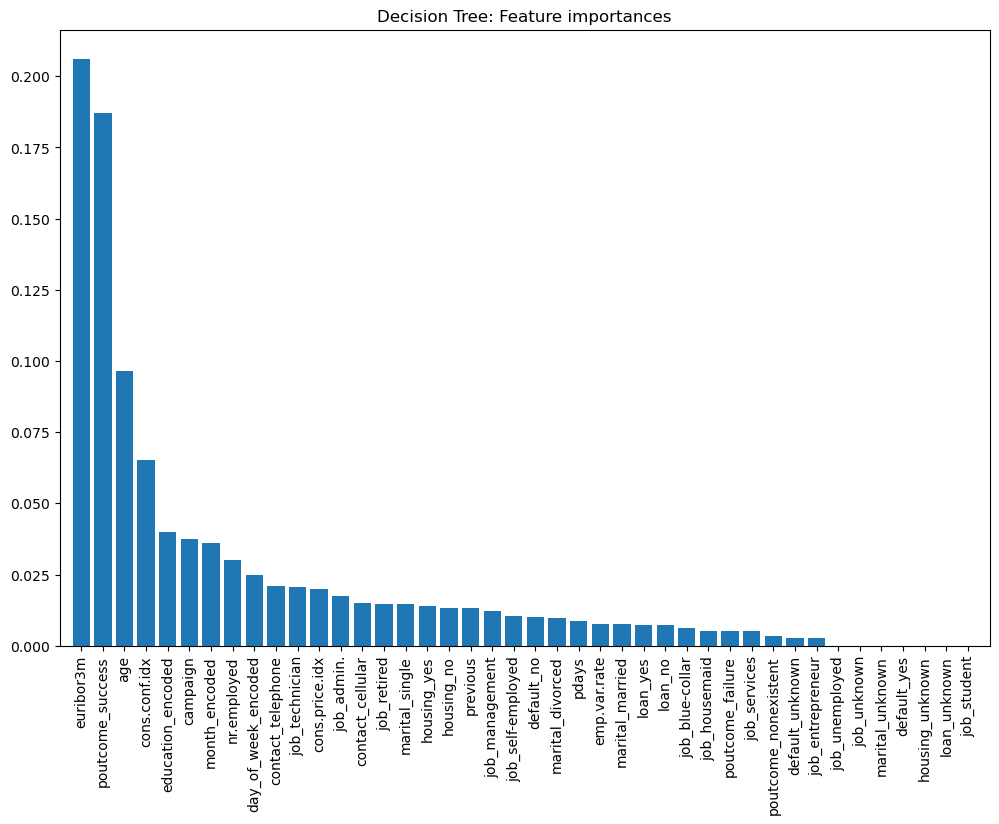

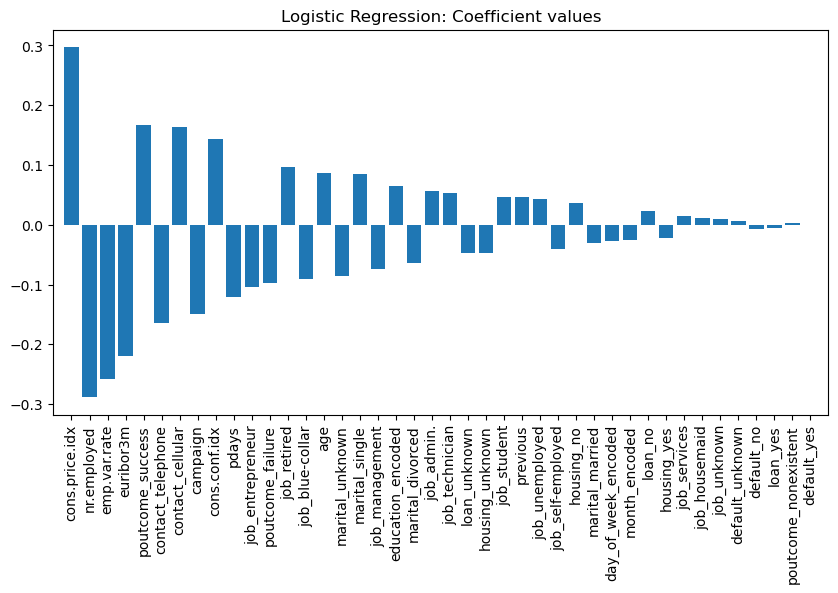

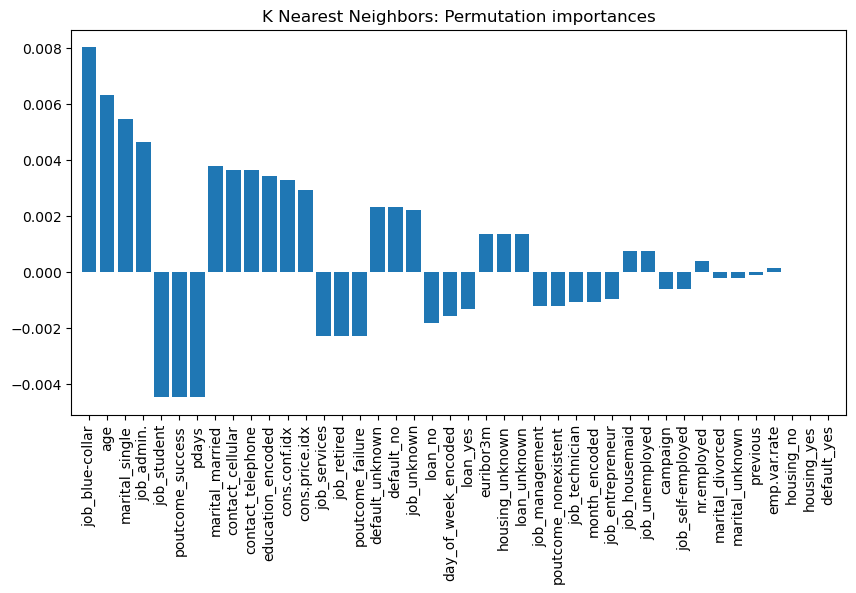

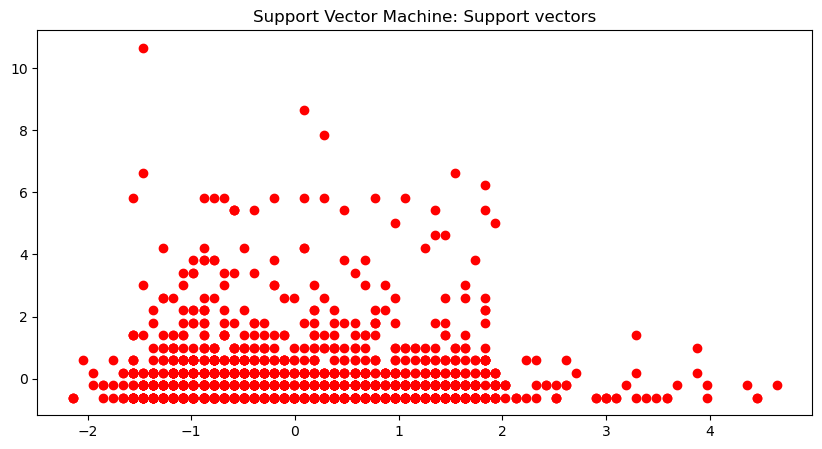

In [188]:

# show the descriptive results for each winning model
dt_model = results_df.loc['Decision Tree', 'estimator']
lgr_model = results_df.loc['Logistic Regression', 'estimator']
knn_model = results_df.loc['k Nearest Neighbors', 'estimator']
svm_model = results_df.loc['Support Vector Machine', 'estimator']

show_decision_tree(dt_model, X, 'Decision Tree')
show_coefficients(lgr_model, X, 'Logistic Regression')
show_permutation_importances(knn_model, X_test, y_test, 'K Nearest Neighbors')
show_svm(svm_model, X, 'Support Vector Machine')

# Model choice:  Logistic Regression
Since the Logistic Regression model has the highest recall and comparable accuracy, and the coefficient values map well to the stated goals of the business problem, we will drill down and work on further refining our chose logistic regression model.

In [141]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def show_confusion_matrices(models, X, y, titles):
    # Set up a 2x2 grid for displaying confusion matrices
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.ravel()  # Flatten the 2D array of axes into a 1D array
    
    for i, (model, title) in enumerate(zip(models, titles)):
        y_pred = model.predict(X)
        cm = confusion_matrix(y, y_pred)

        # Plotting the confusion matrix
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f'{title}: Confusion Matrix')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()


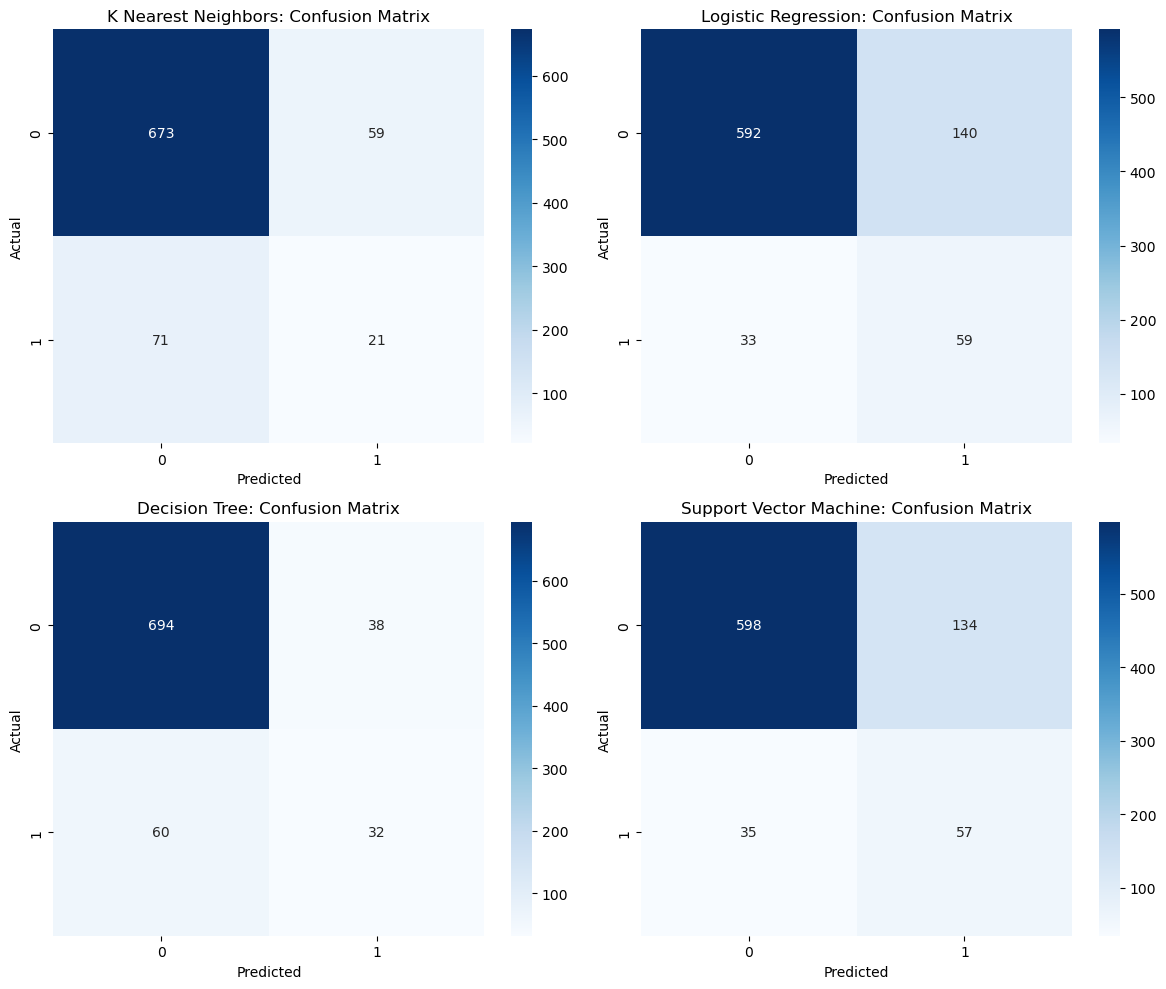

In [189]:
show_confusion_matrices([knn_model, lgr_model, dt_model, svm_model], X_test, y_test, ['K Nearest Neighbors', 'Logistic Regression', 'Decision Tree', 'Support Vector Machine'])





### Working to get more positives

All of our models are under-representing positives in their predictions.  Just for fun, I'm going to try some hybrid models to see if we can improve this.

In [198]:
knn_preds = knn_model.predict(X_test)
lgr_preds = lgr_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
svm_preds = svm_model.predict(X_test)

knn_or_dt = knn_preds | dt_preds
knn_or_lgr = knn_preds | lgr_preds
knn_or_svm = knn_preds | svm_preds
dt_or_lgr = dt_preds | lgr_preds
dt_or_svm = dt_preds | svm_preds
lgr_or_svm = lgr_preds | svm_preds

In [208]:
# build a dataframe to store the results
res_dict = {'name': ['k Nearest Neighbors or Decision Tree', 'k Nearest Neighbors or Logistic Regression', 'k Nearest Neighbors or Support Vector Machine',
                      'Decision Tree or Logistic Regression', 'Decision Tree or Support Vector Machine', 'Logistic Regression or Support Vector Machine'],
            'accuracy': [0, 0, 0, 0, 0, 0],
            'precision': [0, 0, 0, 0, 0, 0],
            'recall': [0, 0, 0, 0, 0, 0],
            'f1': [0, 0, 0, 0, 0, 0],
            'roc_auc': [0, 0, 0, 0, 0, 0],
            'preds': [knn_or_dt, knn_or_lgr, knn_or_svm, dt_or_lgr, dt_or_svm, lgr_or_svm]}
hybrids_df = pd.DataFrame(res_dict).set_index('name')

# calculate the results for a model
def load_scores(df, i, y_test):
    df.loc[i, 'accuracy'] = accuracy_score(y_test, df.loc[i, 'preds'])
    df.loc[i, 'precision'] = precision_score(y_test, df.loc[i, 'preds'])
    df.loc[i, 'recall'] = recall_score(y_test, df.loc[i, 'preds'])
    df.loc[i, 'f1'] = f1_score(y_test, df.loc[i, 'preds'])
    df.loc[i, 'roc_auc'] = roc_auc_score(y_test, df.loc[i, 'preds'])

    


In [209]:

for i in hybrids_df.index:
    load_scores(hybrids_df, i, y_test)

hybrids_df









,accuracy,precision,recall,f1,roc_auc,preds
name,,,,,,
k Nearest Neighbors or Decision Tree,0.838592,0.330579,0.434783,0.375587,0.662063,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
k Nearest Neighbors or Logistic Regression,0.754854,0.258772,0.641304,0.368750,0.705215,"[1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, ..."
k Nearest Neighbors or Support Vector Machine,0.759709,0.259091,0.619565,0.365385,0.698444,"[1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
Decision Tree or Logistic Regression,0.777913,0.282297,0.641304,0.392027,0.718193,"[1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, ..."
Decision Tree or Support Vector Machine,0.786408,0.292079,0.641304,0.401361,0.722975,"[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
Logistic Regression or Support Vector Machine,0.763350,0.271111,0.663043,0.384858,0.719500,"[1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, ..."


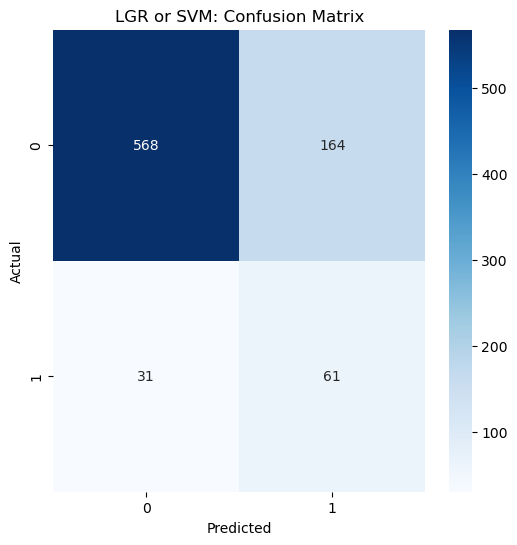

In [193]:
# show the confusion matrix for the KNN or DT model
cm = confusion_matrix(y_test, lgr_or_svm)

# Plotting the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('LGR or SVM: Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Logistic Regression with Poly

In [535]:
#slice the data to get only columns with coefficients not equal to zero from the logistic regression model with lasso
X_lasso = X.loc[:, X.columns[lgr_model.coef_[0] != 0]]

X_lasso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4119 non-null   int64  
 1   campaign           4119 non-null   int64  
 2   pdays              4119 non-null   int64  
 3   emp.var.rate       4119 non-null   float64
 4   cons.price.idx     4119 non-null   float64
 5   cons.conf.idx      4119 non-null   float64
 6   nr.employed        4119 non-null   float64
 7   education_encoded  4119 non-null   int64  
 8   month_encoded      4119 non-null   int64  
 9   job_admin.         4119 non-null   bool   
 10  job_blue-collar    4119 non-null   bool   
 11  job_entrepreneur   4119 non-null   bool   
 12  job_management     4119 non-null   bool   
 13  job_retired        4119 non-null   bool   
 14  job_self-employed  4119 non-null   bool   
 15  job_student        4119 non-null   bool   
 16  job_technician     4119 

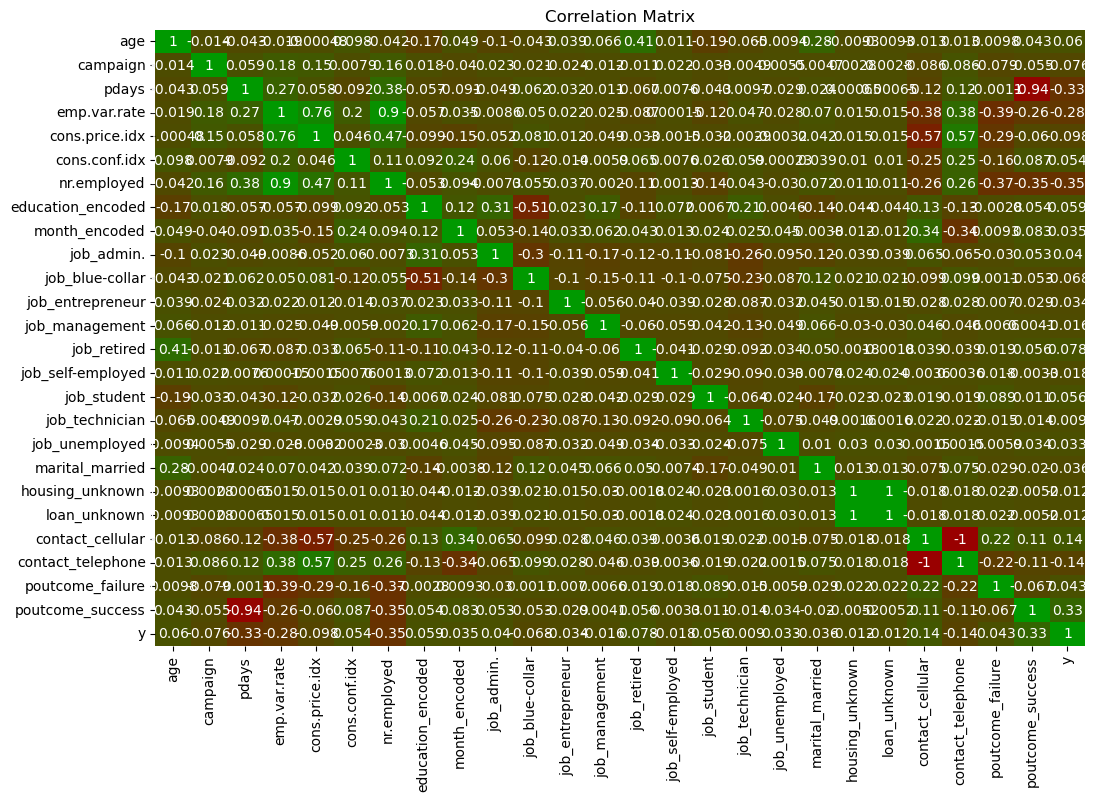

In [536]:


# show the correlation matrix for the selected columns with y
corr = X_lasso.join(y).corr()
plt.figure(figsize=(12, 8))

from matplotlib.colors import LinearSegmentedColormap

# Define the colors for the colormap (dark red for -1, bright green for 1)
colors = [(0.6, 0, 0), (0, 0.6, 0)]  # Dark red -> bright green

# Create the colormap
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

sns.heatmap(corr, annot=True, cmap=cmap, cbar=False)
plt.title('Correlation Matrix')
plt.show()





In [537]:
# rerun the logistic regression search with the scoring set to 'precision', lasso regularization, a poly preprocessing step, and the selected columns

import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer

def lgr_search_poly(X, y, poly_columns):
    mask = X.columns.isin(poly_columns)

    # Define a ColumnTransformer: Apply PolynomialFeatures only to specific columns
    column_transformer = ColumnTransformer(transformers=[
                                                        ('poly', PolynomialFeatures(include_bias=False), mask)
                                                        ], 
                                            remainder='passthrough')  # Keep non-target columns as-is

    # Define the pipeline
    pipeline = Pipeline(steps=[
     #   ('scaler', StandardScaler()),               # Standardize the features
        ('column_transformer', column_transformer), # Apply transformations
        ('logistic_regression', LogisticRegression(solver='liblinear', penalty='l1', max_iter=1000))  # Logistic Regression
    ])

    # Define the parameter grid for GridSearchCV
    param_grid = {
        'column_transformer__poly__degree': [1, 2],  # Degrees of PolynomialFeatures
        'logistic_regression__C': [0.01, 0.1, 1, 10]                 # Regularization strength
    }

    # Set up GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='precision', n_jobs=-1)

    # Fit the grid search to the data
    grid_search.fit(X, y)

    # Return the best estimator found by GridSearchCV
    return grid_search



In [538]:
# Run the grid search
poly_columns = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'education_encoded']
lgr_model = lgr_search_poly(X_lasso, y, poly_columns)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [539]:
# show the parameters and accuracy for the best model
print(f'Best parameters: {lgr_model.best_params_}')
print(f'Best accuracy: {lgr_model.best_score_}')


Best parameters: {'column_transformer__poly__degree': 1, 'logistic_regression__C': 1}
Best accuracy: 0.6843061955965182


# Comparison Matrix for Model Types

| **Model**                  | **Handles Imbalanced Classes** | **Training Speed**     | **Interpretability** |
|----------------------------|--------------------------------|------------------------|----------------------|
| **Logistic Regression**     | Fair <br>(can use regularization, balanced class weights) | Fast                  | High <br>(coefficients are interpretable) |
| **Decision Trees**          | Fair <br>(prone to overfitting with imbalanced data) | Fast                  | High <br>(easy to visualize decision rules) |
| **k-Nearest Neighbors (k-NN)** | Poor <br>(sensitive to imbalanced data, performs poorly without special techniques) | Slow <br>(scales poorly with large datasets) | Low <br>(no interpretable model structure) |
| **Support Vector Machines (SVM)** | Poor <br>(sensitive to imbalance, can use class weights) | Slow <br>(especially for large datasets) | Low <br>(hard to interpret, especially in high dimensions) |
